# Функции одной переменной

Давайте рассмотрим на примере параболы, как можно построить график функции одной переменной в python. Как мы знаем, график параболы имеет вид  y=x^2. Давайте построим её на промежутке [-10,10] с шагом изменения аргумента 0.01. 

За визуализацию данных здесь отвечает библиотека matplotlib.pyplot, она реализует удобный интерфейс построения графиков в python. Сам модуль pyplot в основном предназначен для интерактивных графиков и простых случаев программной генерации графиков.

Для создания последовательностей чисел в numpy имеется функция numpy.arange(), аналогичная встроенной в python range(), только вместо списков она возвращает массивы и принимает не только целые значения.

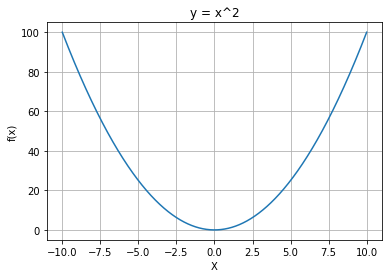

In [9]:
#  импортируем необходимые библиотеки для работы с массивами чисел и для визуализации
import numpy as np
import matplotlib.pyplot as plt

# х - аргумент в нашей функции. 
# передадим начало и конец числового отрезка нашей функции и шаг аргумента:
x = np.arange(-10, 10.01, 0.01) # массив значений аргумента

# построение графика параболы
plt.plot(x, x**2) 

# включим сетку на графике 
plt.grid(True)
plt.title('y = x^2')
plt.xlabel('X')
plt.ylabel('f(x)')
# показать график
plt.show() 

### Задание 3.9.3 

L2 - loss функция
L = (2.1 - w0 - w1)^2 + (2.9 - w0 - 3w1)^2 + (4.1 - w0 - 5w1)^2

gradL = (dL/dw0;dL/dw1)

dL/dw0 = 6w0 + 18w1 - 18.2
dL/dw1 = 18w0 + 70w1 - 62.6

In [1]:
import numpy as np

In [4]:
a = np.array([[6, 18], [18, 70]])
b = np.array([18.2, 62.6])

In [5]:
np.linalg.solve(a,b)

array([-1.53333333, -0.5       ])

### Задание 3.9.4

Вычислите градиент массива f, увеличив шаг сетки в 7 раз, и укажите значение 7-го элемента массива f получившихся градиентов.

In [6]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])

In [8]:
gr_f = np.gradient(f, 7)

In [9]:
gr_f[7]

1.4285714285714286

Общий интерфейс для решения задач как условной, так и безусловной оптимизации в пакете scipy.optimize предоставляется функцией minimize(). Однако известно, что универсального способа для решения всех задач не существует, поэтому выбор подходящего метода как всегда ложится на плечи исследователя.

Подходящий алгоритм оптимизации задаётся с помощью аргумента функции minimize(..., method="").

Функция minimize из пакета scipy.optimize предоставляет общий интерфейс для решения задач условной и безусловной минимизации скалярных функций нескольких переменных. Чтобы продемонстрировать её работу, нам понадобится подходящая функция нескольких переменных, которую мы будем минимизировать.

Для этих целей прекрасно подойдет функция Розенброка от N переменных, которая имеет вид:

$ f(x) = \sum_{i=1}^{N-1}\left [ 100 \left ( x_{i+1} - x_{i}^{2} \right)^{2} - \left ( 1 - x_{i} \right )^{2}) \right ] $

Несмотря на то, что функция Розенброка и её матрицы Якоби и Гессе (первой и второй производной соответственно) уже определены в пакете scipy.optimize, определим её самостоятельно.

In [2]:
import numpy as np

def rosen(x):
# Функция Розенброка
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

Для наглядности отрисуем в 3D значения функции Розенброка от двух переменных.

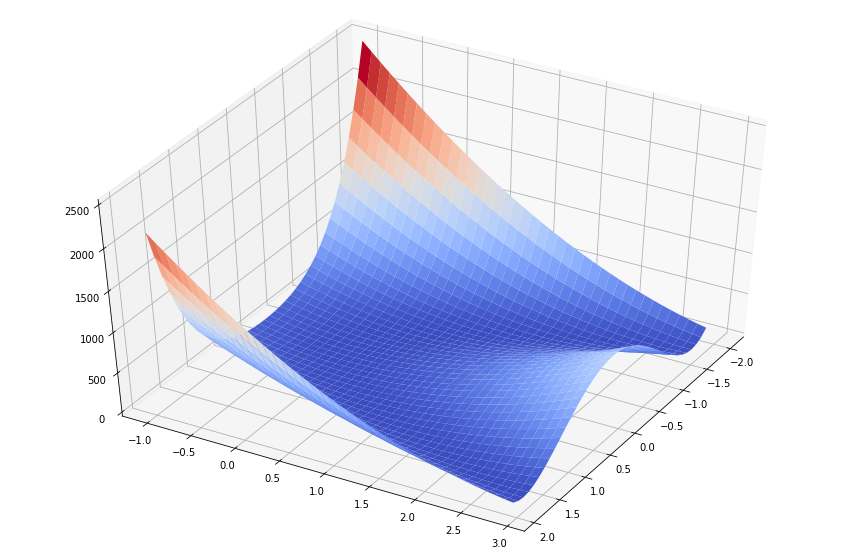

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

### Метод Пауэлла

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, нужно установить method = 'powell' в функции minim.

In [4]:
from scipy.optimize import minimize 
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='powell',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 1622
[1. 1. 1. 1. 1.]


### Симплекс-метод Нелдера-Мида (Nelder-Mead)

Пусть имеется начальная точка x0 в 5-мерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка с помощью алгоритма симплекса Nelder-Mead (алгоритм указан в качестве значения параметра method):

In [5]:
from scipy.optimize import minimize
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


Симплекс-метод является самым простым способом свести к минимуму явно определенную и довольно гладкую функцию. Он не требует вычисления производных функции, достаточно задать только её значения. Метод Нелдера-Мида является хорошим выбором для простых задач минимизации. Однако, поскольку он не использует оценки градиента, для поиска минимума может потребоваться больше времени.